In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import pymc3 as pm 
import warnings
warnings.simplefilter(action="ignore")
RANDOM_SEED = 123

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Research questions

**Research question(s):**

1. In real traffic, is there any association between: (a) the repeated exposure to TORs or (b) the gaze direction when the TOR is issued (on NDRT item vs. On path) on the driver response to the TOR?
2. In real traffic, when drivers who are looking at an NDRT item (vs. On path) receive a TOR, what are  the expected response times for actions needed to respond to the TOR? 

In [32]:
'''Load data'''
data = pd.read_excel('dataframe_models.xlsx')
data = data[data.Duration!=1]
data = data[(data['Glance at take-over request']=='Forward')| (data['Glance at take-over request']=='Task')]
data = data[(data['Glance data missing']!=1)]

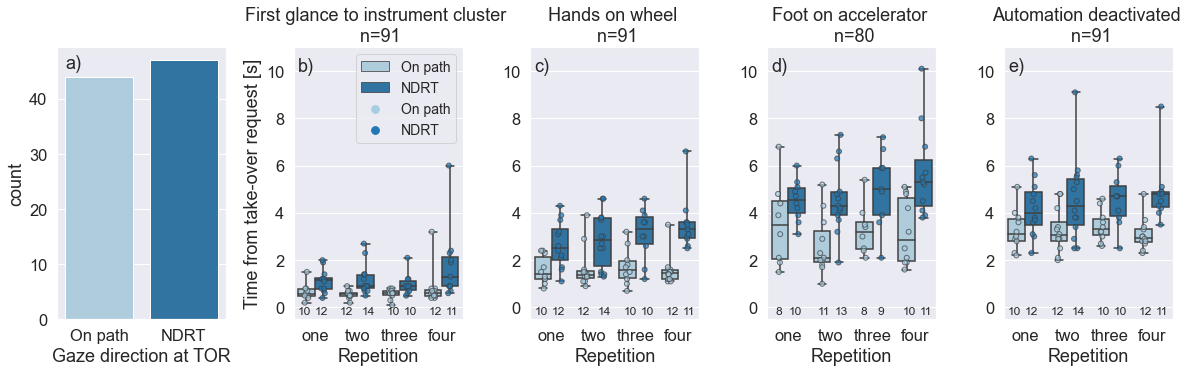

In [33]:
'''Create boxplots (Fig. 7.) '''
data['Glance at take-over request'] = data['Glance at take-over request'].map({'Forward': 'On path', 'Task': 'NDRT'})

plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.4, hspace=0.1)
sns.set(font_scale=1.5)
plt.subplot(151); sns.countplot(x= 'Glance at take-over request', data=data, palette="Paired"); #plt.title('Glance location at TOR')
plt.xlabel('Gaze direction at TOR')
plt.text(-0.4, 45.5, 'a)')
# First glance to IC
plt.subplot(152); sns.boxplot(x = 'Exposure_str', y='First glance to instrument cluster', 
                              hue='Glance at take-over request', data=data[data['First glance to instrument cluster']!=0]
                              , whis=20, palette="Paired",hue_order= ["On path", "NDRT"]); plt.legend(''); 
sns.stripplot(x = 'Exposure_str', y='First glance to instrument cluster', 
                              hue= 'Glance at take-over request', data=data[data['First glance to instrument cluster']!=0]
              , dodge=True, palette="Paired", linewidth=1, alpha=0.7, label=None,hue_order= ["On path", "NDRT"]); plt.legend(fontsize=14); plt.xlabel('Repetition')
plt.title('First glance to instrument cluster \n n=' + str(len(data[data['First glance to instrument cluster']!=0]))); plt.ylabel('Time from take-over request [s]'); plt.ylim(0,11); 
plt.ylim([-0.5, 11])
plt.text(-0.4,-0.3,'10', fontsize=12);plt.text(0,-0.3,'12', fontsize=12); plt.text(0.6,-0.3,'12', fontsize=12); plt.text(1.1,-0.3,'14', fontsize=12) 
plt.text(1.7,-0.3,'10', fontsize=12);plt.text(2.1,-0.3,'10', fontsize=12); plt.text(2.7,-0.3,'12', fontsize=12); plt.text(3.1,-0.3,'11', fontsize=12) 
plt.text(-0.4, 10, 'b)')
# Hands on wheel 
plt.subplot(153); sns.boxplot(x = 'Exposure_str', y='Hands on wheel', 
                              hue= 'Glance at take-over request', data=data[data['Hands on wheel']!=0], whis=20,  
                              palette="Paired", hue_order = ["On path", "NDRT"]); 
sns.stripplot(x = 'Exposure_str', y='Hands on wheel', 
                              hue= 'Glance at take-over request', data=data[data['Hands on wheel']!=0], dodge=True,  
                                palette="Paired", linewidth=1, alpha=0.7,hue_order = ["On path", "NDRT"]); plt.xlabel('Repetition')
plt.title('Hands on wheel \n n=' + str(len(data[data['Hands on wheel']!=0]))); plt.ylabel('');plt.legend([],[], frameon=False); plt.ylim(0,11)
plt.ylim([-0.5, 11])
plt.text(-0.4,-0.3,'10', fontsize=12);plt.text(0,-0.3,'12', fontsize=12); plt.text(0.6,-0.3,'12', fontsize=12); plt.text(1.1,-0.3,'14', fontsize=12) 
plt.text(1.7,-0.3,'10', fontsize=12);plt.text(2.1,-0.3,'10', fontsize=12); plt.text(2.7,-0.3,'12', fontsize=12); plt.text(3.1,-0.3,'11', fontsize=12) 
plt.text(-0.4, 10, 'c)')
# Foot on pedal 
plt.subplot(154); sns.boxplot(x = 'Exposure_str', y='Foot on accelerator pedal', 
                              hue= 'Glance at take-over request', data=data[data['Foot on accelerator pedal']!=0],
                              whis=20, palette="Paired"); 
sns.stripplot(x = 'Exposure_str', y='Foot on accelerator pedal', 
                              hue= 'Glance at take-over request', data=data[data['Foot on accelerator pedal']!=0], 
              dodge=True, palette="Paired", linewidth=1, alpha=0.7); plt.xlabel('Repetition')
plt.title('Foot on accelerator \n n=' + str(len(data[data['Foot on accelerator pedal']!=0]))); plt.ylabel('');plt.legend([],[], frameon=False); plt.ylim(0,11)
plt.ylim([-0.5, 11])
plt.text(-0.3,-0.3,'8', fontsize=12);plt.text(0,-0.3,'10', fontsize=12); plt.text(0.7,-0.3,'11', fontsize=12); plt.text(1.1,-0.3,'13', fontsize=12) 
plt.text(1.7,-0.3,'8', fontsize=12);plt.text(2.1,-0.3,'9', fontsize=12); plt.text(2.7,-0.3,'10', fontsize=12); plt.text(3.1,-0.3,'11', fontsize=12) 
plt.text(-0.4, 10, 'd)')
# Automation deactivated 
plt.subplot(155); sns.boxplot(x = 'Exposure_str', y='Automation deactivated', 
                              hue= 'Glance at take-over request', data=data, whis=20, palette='Paired');
sns.stripplot(x = 'Exposure_str', y='Automation deactivated', 
                              hue= 'Glance at take-over request', data=data, dodge=True, palette='Paired',
              linewidth=1, alpha=0.7); plt.xlabel('Repetition')
plt.title('Automation deactivated \n n=' + str(len(data[data['Automation deactivated']!=0]))); plt.ylabel('');plt.legend([],[], frameon=False); plt.ylim(0,11)
plt.ylim([-0.5, 11])
plt.text(-0.4,-0.3,'10', fontsize=12);plt.text(0,-0.3,'12', fontsize=12); plt.text(0.6,-0.3,'12', fontsize=12); plt.text(1.1,-0.3,'14', fontsize=12) 
plt.text(1.7,-0.3,'10', fontsize=12);plt.text(2.1,-0.3,'10', fontsize=12); plt.text(2.7,-0.3,'12', fontsize=12); plt.text(3.1,-0.3,'11', fontsize=12) 
plt.text(-0.4, 10, 'e)')
plt.savefig('responsetimes.png', dpi=300)
plt.savefig('responsetimes.svg', dpi=300)

# Model 1: First glance to instrument cluster response time 

In [4]:
'''Prepare dataset'''
var = 'First glance to instrument cluster'
df_rt = data[['DriverID', 'tp_idx', 'Exposure','Exposure_str', var, 'Glance at take-over request', 'times_on_task']].dropna()
df_rt = df_rt.drop(df_rt[df_rt[var]==0].index)
df_rt.DriverID = pd.Categorical(df_rt.DriverID); df_rt['tp_idx'] = pd.factorize(df_rt.DriverID)[0]
n_subjects = len(df_rt.DriverID.unique())

# Add dummy-variables
df_rt[['X_exp1','X_exp2','X_exp3','X_exp4']] = pd.get_dummies(df_rt.Exposure)
df_rt[['X_notask', 'X_task']] = pd.get_dummies(df_rt['Glance at take-over request'])

In [5]:
'''Initialize model'''
with pm.Model() as model: 
    
    # Hyperpriors
    mu_intercept = pm.Normal('mu_intercept', mu=np.log(df_rt[var]).mean(), sd = 1)
    sd_intercept = pm.HalfNormal('sd_intercept', 1) 
    
    # Priors
    sigma = pm.HalfNormal('sigma', sd=1)
    alpha = pm.Normal('alpha', mu=0, sd=1, shape=n_subjects)
    beta_exp = pm.Normal('beta_exp', mu = 0, sd = 1, shape=3)
    beta_task = pm.Normal('beta_task', mu = 0, sd = 1)

    # Model 
    mu = (mu_intercept + sd_intercept*alpha[df_rt['tp_idx']])+pm.math.dot(df_rt[['X_exp2', 'X_exp3', 'X_exp4']],beta_exp)+ pm.math.dot(df_rt['X_task'],beta_task)
  
    # Likelihood 
    likelihood = pm.Lognormal('RT', mu = mu, sd=sigma, observed=df_rt[var])
    trace = pm.sample(3000, cores = 2, tune=2000, target_accept=0.95, random_seed=RANDOM_SEED)
    #prior_predictive = pm.sample_prior_predictive(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta_task, beta_exp, alpha, sigma, sd_intercept, mu_intercept]
Sampling 2 chains, 0 divergences: 100%|██████████| 10000/10000 [00:58<00:00, 170.46draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [6]:
'''Save traces to .csv'''
#az.plot_trace(trace, compact=True);
trace_df = pm.trace_to_dataframe(trace)
trace_df.to_csv('trace_first_glance_to_instrument_cluster_response_time.csv')
#az.summary(trace)

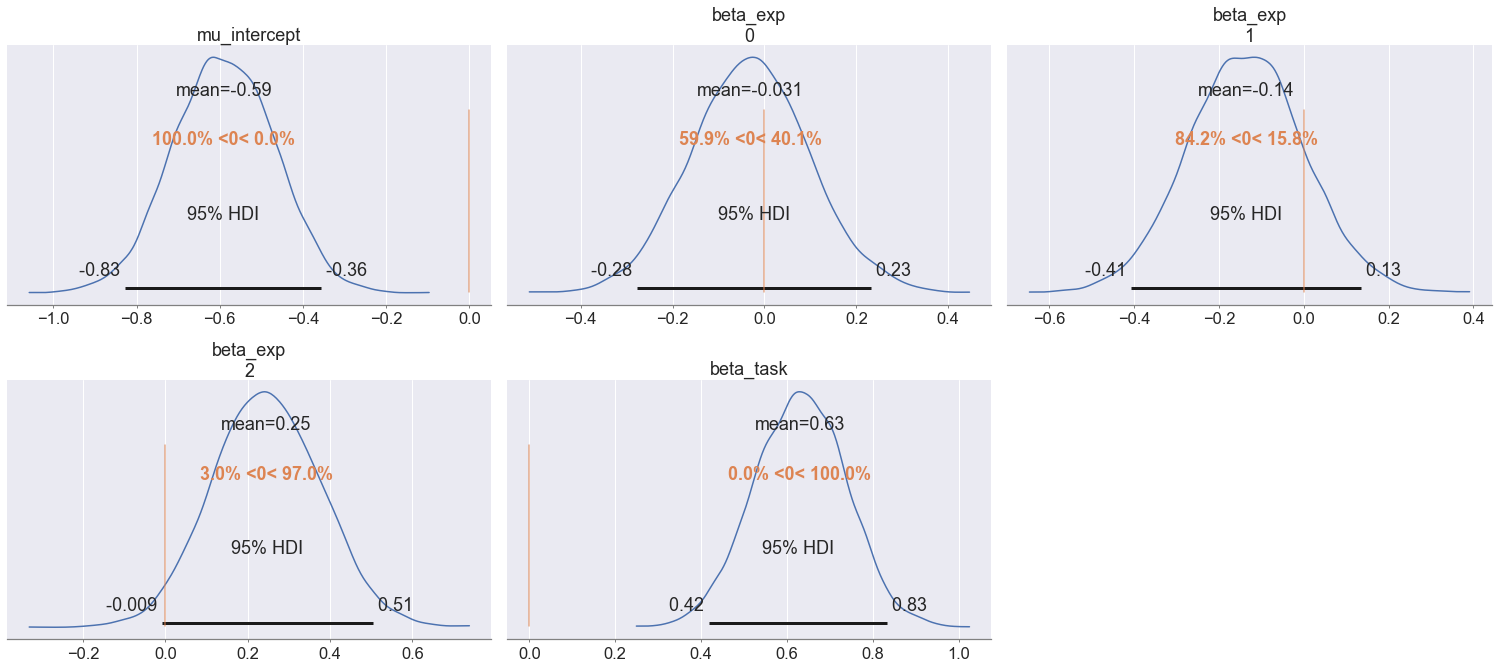

In [7]:
'''Plot posterior distributions of model parameters'''
pm.plot_posterior(trace, var_names = ['mu_intercept', 'beta_exp', 'beta_task'],
                  ref_val = 0, credible_interval = 0.95);

100%|██████████| 6000/6000 [00:13<00:00, 456.44it/s]


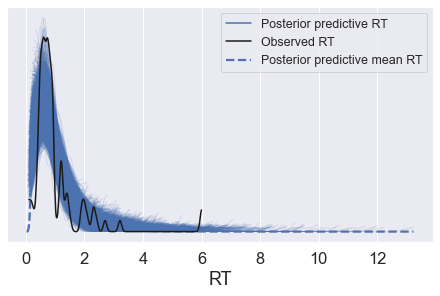

In [8]:
'''Posterior draws from model'''
with model:
    ppc = pm.sample_posterior_predictive(
        trace, var_names=['RT', 'alpha', 'mu_intercept', 'sd_intercept', 'beta_exp', 'beta_task', 'sigma'], random_seed=RANDOM_SEED
    )

az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=model));

In [9]:
'''Predicted response times based on last exposure to TOR'''
task, fwd, task95, fwd95 = list(), list(), list(), list()
for i in range(0,100):
    task.append(np.median(ppc['RT'][i][(df_rt['Glance at take-over request']=='Task') & (df_rt['Exposure']==6)]))
    fwd.append(np.median(ppc['RT'][i][(df_rt['Glance at take-over request']=='Forward')& (df_rt['Exposure']==6)]))
    task95.append(np.percentile(ppc['RT'][i][(df_rt['Glance at take-over request']=='Task')& (df_rt['Exposure']==6)], 95))
    fwd95.append(np.percentile(ppc['RT'][i][(df_rt['Glance at take-over request']=='Forward')& (df_rt['Exposure']==6)],95))
    
print('Task median: ', pm.stats.hpd(np.array(task), 0.95)); print(np.median(task))
print('Fwd median: ', pm.stats.hpd(np.array(fwd), 0.95)); print(np.median(fwd))
print('Task 95th: ', pm.stats.hpd(np.array(task95), 0.95)); print(np.median(task95))
print('Fwd 95th: ', pm.stats.hpd(np.array(fwd95), 0.95)); print(np.median(fwd95))


Task median:  [0.90214869 2.00041568]
1.3404586549525588
Fwd median:  [0.51048548 1.06823439]
0.7017900361305267
Task 95th:  [1.81097989 4.42041674]
2.714109373074282
Fwd 95th:  [0.91427173 2.57262582]
1.5294891488953177


# Model 3: Hands on wheel response time 

In [10]:
'''Prepare dataset'''
var = 'Hands on wheel'
df_rt = data[['DriverID', 'tp_idx', 'Exposure','Exposure_str', var,'Glance_on_road', 'Glance at take-over request', 'times_on_task']].dropna()
df_rt = df_rt.drop(df_rt[df_rt[var]==0].index)
n_subjects = len(df_rt.tp_idx.dropna().unique())

df_rt.DriverID = pd.Categorical(df_rt.DriverID); df_rt['tp_idx'] = pd.factorize(df_rt.DriverID)[0]

# Add dummy-variables
df_rt[['X_exp1','X_exp2','X_exp3','X_exp4']] = pd.get_dummies(df_rt.Exposure)
df_rt[['X_notask', 'X_task']] = pd.get_dummies(df_rt['Glance at take-over request'])

In [11]:
'''Initialize model'''
with pm.Model() as model: 
    
    # Hyperpriors
    mu_intercept = pm.Normal('mu_intercept', mu=np.log(df_rt[var]).mean(), sd=1)
    sd_intercept = pm.HalfNormal('sd_intercept',1)
    
    # Define priors
    sigma = pm.HalfNormal('sigma', sd=1)
    alpha = pm.Normal('alpha', mu=0, sd=1, shape=n_subjects)
    beta_exp = pm.Normal('beta_exp', mu = 0, sd = 1, shape=3)
    beta_task = pm.Normal('beta_task', mu = 0, sd = 1)
    
    # Model
    mu = (mu_intercept + sd_intercept*alpha[df_rt['tp_idx']]) + pm.math.dot(df_rt[['X_exp2', 'X_exp3', 'X_exp4']],beta_exp)+ pm.math.dot(df_rt['X_task'],beta_task)
    
    likelihood = pm.Lognormal('RT', mu = mu, sd=sigma, observed=df_rt[var])
    trace = pm.sample(3000, cores = 2, tune=2000, target_accept=0.95, random_seed=RANDOM_SEED)
    #prior_predictive = pm.sample_prior_predictive(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta_task, beta_exp, alpha, sigma, sd_intercept, mu_intercept]
Sampling 2 chains, 0 divergences: 100%|██████████| 10000/10000 [01:00<00:00, 164.57draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [12]:
'''Save traces to .csv'''
#az.plot_trace(trace, compact=True);
trace_df = pm.trace_to_dataframe(trace)
trace_df.to_csv('trace_hands_on_wheel_response_time.csv')
#az.summary(trace)

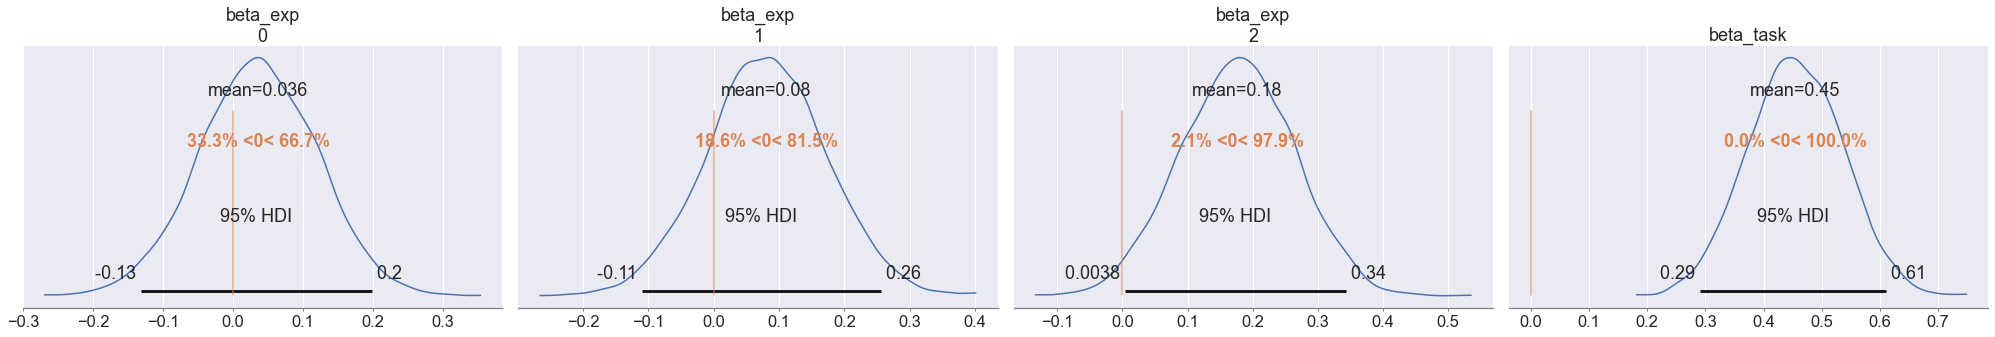

In [13]:
'''Plot posterior distributions of model parameters'''
pm.plot_posterior(trace, var_names = ['beta_exp', 'beta_task'],
                  ref_val = 0, credible_interval = 0.95);

100%|██████████| 500/500 [00:01<00:00, 454.05it/s]


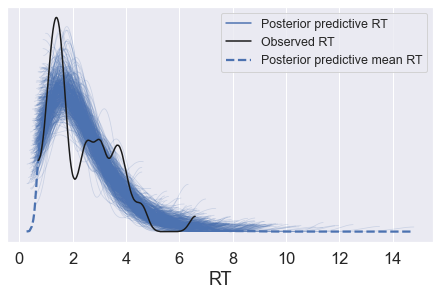

In [14]:
'''Posterior draws from model'''
with model:
    ppc = pm.sample_posterior_predictive(
        trace, random_seed=RANDOM_SEED, var_names=['alpha', 'RT', 'mu_intercept', 'sd_intercept', 'beta_exp', 'sigma', 'beta_task'], samples = 500)

az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=model));

Task median:  [2.34388881 4.16606461]
3.17967127151498
Fwd median:  [1.18479023 1.87086804]
1.541820519637216
Task 95th:  [3.87984719 7.42974149]
5.237431458963583
Fwd 95th:  [1.99458002 3.5165126 ]
2.5409285865776985


<AxesSubplot:ylabel='Density'>

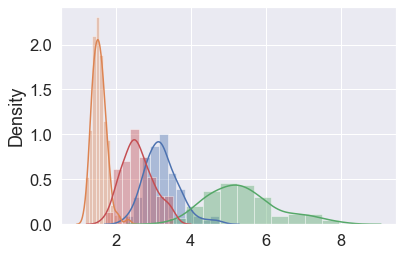

In [15]:
'''Predicted response times based on last exposure to TOR'''
task, fwd, task95, fwd95 = list(), list(), list(), list()
for i in range(0,100):
    task.append(np.median(ppc['RT'][i][(df_rt['Glance at take-over request']=='Task') & (df_rt['Exposure']==6)]))
    fwd.append(np.median(ppc['RT'][i][(df_rt['Glance at take-over request']=='Forward')& (df_rt['Exposure']==6)]))
    task95.append(np.percentile(ppc['RT'][i][(df_rt['Glance at take-over request']=='Task')& (df_rt['Exposure']==6)], 95))
    fwd95.append(np.percentile(ppc['RT'][i][(df_rt['Glance at take-over request']=='Forward')& (df_rt['Exposure']==6)],95))
    
print('Task median: ', pm.stats.hpd(np.array(task), 0.95)); print(np.median(task))
print('Fwd median: ', pm.stats.hpd(np.array(fwd), 0.95)); print(np.median(fwd))
print('Task 95th: ', pm.stats.hpd(np.array(task95), 0.95)); print(np.median(task95))
print('Fwd 95th: ', pm.stats.hpd(np.array(fwd95), 0.95)); print(np.median(fwd95))
sns.distplot(task)
sns.distplot(fwd)
sns.distplot(task95)
sns.distplot(fwd95)

# Model 4: Foot on accelerator response time 

In [16]:
'''Prepare dataset'''
var = 'Foot on accelerator pedal'
df_rt = data[['DriverID', 'tp_idx', 'Exposure','Exposure_str', var,'Glance_on_road', 'Glance at take-over request', 'times_on_task']].dropna()
df_rt = df_rt.drop(df_rt[df_rt[var]==0].index)
df_rt.DriverID = pd.Categorical(df_rt.DriverID); df_rt['tp_idx'] = pd.factorize(df_rt.DriverID)[0]
n_subjects = len(df_rt.DriverID.unique())

# Add dummy-variables
df_rt[['X_exp1','X_exp2','X_exp3','X_exp4']] = pd.get_dummies(df_rt.Exposure)
df_rt[['X_notask', 'X_task']] = pd.get_dummies(df_rt['Glance at take-over request'])

In [17]:
'''Initialize model'''
with pm.Model() as model: 
    # Hyperpriors
    mu_intercept = pm.Normal('mu_intercept', mu=np.log(df_rt[var]).mean(), sd=1)
    sd_intercept = pm.HalfNormal('sd_intercept', 1)
    
     # Define priors
    sigma = pm.HalfNormal('sigma', sd=1)
    alpha = pm.Normal('alpha', mu=0, sd=1, shape=n_subjects)
    beta_exp = pm.Normal('beta_exp', mu = 0, sd = 1, shape=3)
    beta_task = pm.Normal('beta_task', mu = 0, sd = 1)
    
    # Model
    mu = (mu_intercept + sd_intercept*alpha[df_rt['tp_idx']]) + pm.math.dot(df_rt[['X_exp2', 'X_exp3', 'X_exp4']],beta_exp)+ pm.math.dot(df_rt['X_task'],beta_task)
    
    # Likelihood 
    likelihood = pm.Lognormal('RT', mu = mu, sd=sigma, observed=df_rt[var])
    trace = pm.sample(3000, cores = 2, tune=2000, target_accept=0.95, random_seed=RANDOM_SEED)
    #prior_predictive = pm.sample_prior_predictive(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta_task, beta_exp, alpha, sigma, sd_intercept, mu_intercept]
Sampling 2 chains, 0 divergences: 100%|██████████| 10000/10000 [00:58<00:00, 171.36draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [18]:
'''Save traces to .csv'''
#az.plot_trace(trace, compact=True);
trace_df = pm.trace_to_dataframe(trace)
trace_df.to_csv('trace_foot_on_accelerator_response_time.csv')
#az.summary(trace)

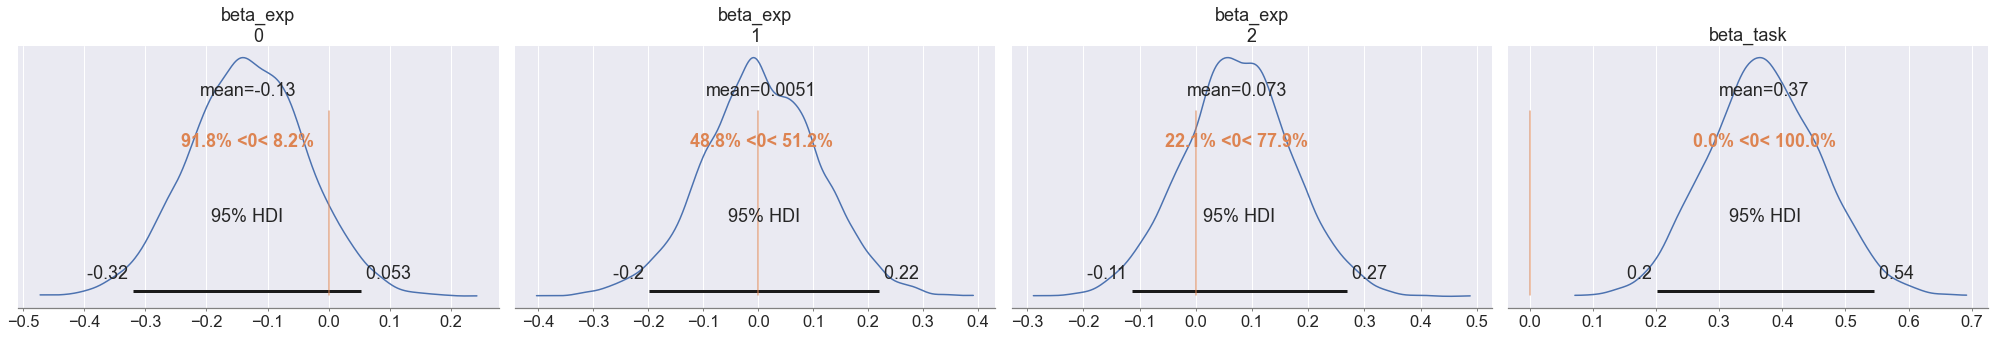

In [19]:
'''Plot posterior distributions of model parameters'''
pm.plot_posterior(trace, var_names = ['beta_exp', 'beta_task'],
                  ref_val = 0, credible_interval = 0.95);

100%|██████████| 6000/6000 [00:13<00:00, 452.11it/s]


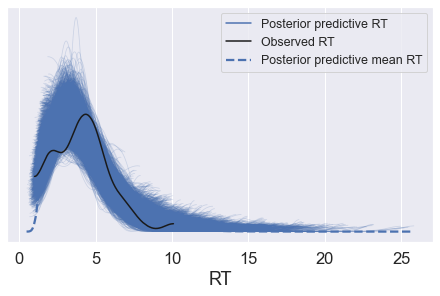

In [20]:
'''Posterior draws from model'''
with model:
    ppc = pm.sample_posterior_predictive(trace, random_seed=RANDOM_SEED)

az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=model));

Median task:  [3.52830543 6.63315242]
5.336929791300532
Median fwd:  [2.1340312  3.67230002]
3.0290339509079884
95th task:  [ 6.17229212 13.13038125]
8.71672907520801
95th fwd:  [3.2319786  7.24648059]
4.778846264434983


<AxesSubplot:ylabel='Density'>

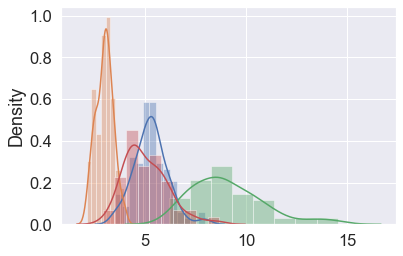

In [21]:
'''Predicted response times based on last exposure to TOR'''
task, fwd, task95, fwd95 = list(), list(), list(), list()
for i in range(0,100):
    task.append(np.median(ppc['RT'][i][(df_rt['Glance at take-over request']=='Task') & (df_rt['Exposure']==6)]))
    fwd.append(np.median(ppc['RT'][i][(df_rt['Glance at take-over request']=='Forward') & (df_rt['Exposure']==6)]))
    task95.append(np.percentile(ppc['RT'][i][(df_rt['Glance at take-over request']=='Task') & (df_rt['Exposure']==6)], 95))
    fwd95.append(np.percentile(ppc['RT'][i][(df_rt['Glance at take-over request']=='Forward') & (df_rt['Exposure']==6)],95))
    
print('Median task: ',  pm.stats.hpd(np.array(task), 0.95)); print(np.median(task))
print('Median fwd: ', pm.stats.hpd(np.array(fwd), 0.95)); print(np.median(fwd))
print('95th task: ', pm.stats.hpd(np.array(task95), 0.95)); print(np.median(task95))
print('95th fwd: ', pm.stats.hpd(np.array(fwd95), 0.95)); print(np.median(fwd95))
sns.distplot(task)
sns.distplot(fwd)
sns.distplot(task95)
sns.distplot(fwd95)

# Model 5: Automation deactivation response time

In [22]:
'''Prepare dataset'''
var = 'Automation deactivated'
df_rt = data[['DriverID', 'tp_idx', 'Exposure','Exposure_str', var,'Glance_on_road', 'Glance at take-over request', 'times_on_task']].dropna()
df_rt = df_rt.drop(df_rt[df_rt[var]==0].index)
df_rt.DriverID = pd.Categorical(df_rt.DriverID); df_rt['tp_idx'] = pd.factorize(df_rt.DriverID)[0]
n_subjects = len(df_rt.DriverID.unique())

# Add dummy-variables
df_rt[['X_exp1','X_exp2','X_exp3','X_exp4']] = pd.get_dummies(df_rt.Exposure)
df_rt[['X_notask', 'X_task']] = pd.get_dummies(df_rt['Glance at take-over request'])

In [23]:
'''Initialize model'''
with pm.Model() as model: 
    
    # Hyperpriors
    mu_intercept = pm.Normal('mu_intercept', mu=np.log(df_rt[var]).mean(), sd=1)
    sd_intercept = pm.HalfNormal('sd_intercept', 1)
    
     # Define priors
    sigma = pm.HalfNormal('sigma', sd=1)
    alpha = pm.Normal('alpha', mu=0, sd=1, shape=n_subjects)
    beta_exp = pm.Normal('beta_exp', mu = 0, sd = 1, shape=3)
    beta_task = pm.Normal('beta_task', mu = 0, sd =1)
    
    # Model
    mu = (mu_intercept + sd_intercept*alpha[df_rt['tp_idx']]) + pm.math.dot(df_rt[['X_exp2', 'X_exp3', 'X_exp4']],beta_exp)+ pm.math.dot(df_rt['X_task'],beta_task)
    
    # Likelihood 
    likelihood = pm.Lognormal('RT', mu = mu, sd=sigma, observed=df_rt[var])
    trace = pm.sample(3000, cores = 2, tune=2000, target_accept=0.95, random_seed=RANDOM_SEED)
    prior_predictive = pm.sample_prior_predictive(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta_task, beta_exp, alpha, sigma, sd_intercept, mu_intercept]
Sampling 2 chains, 0 divergences: 100%|██████████| 10000/10000 [01:04<00:00, 154.84draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [24]:
'''Save traces to .csv'''
#az.plot_trace(trace, compact=True);
trace_df = pm.trace_to_dataframe(trace)
trace_df.to_csv('trace_automation_deactivated_response_time.csv')
#az.summary(trace)

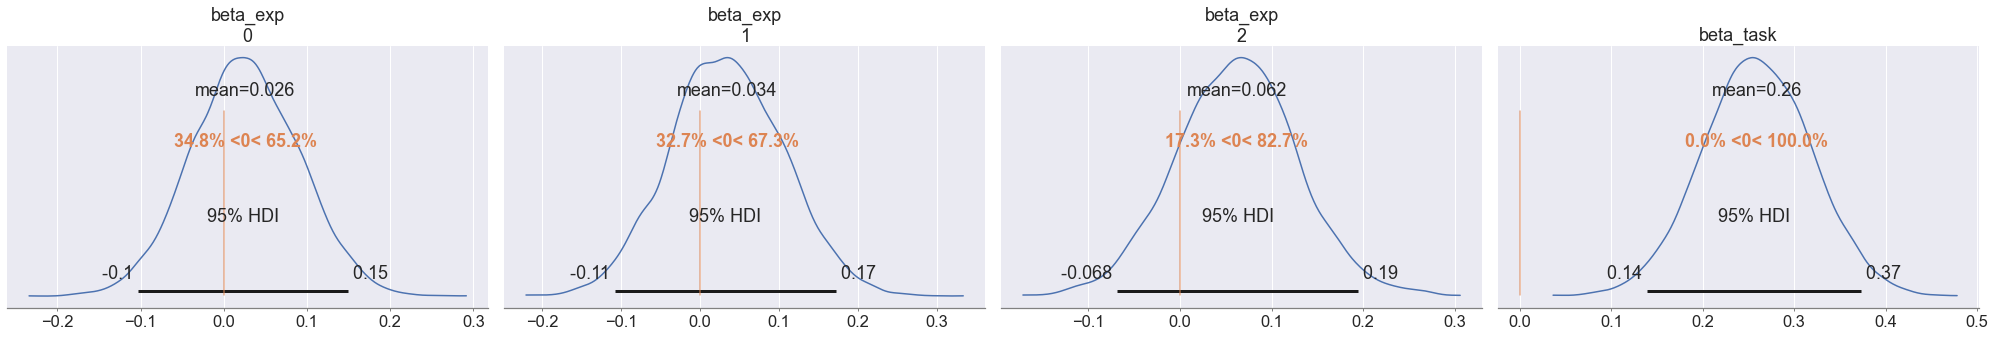

In [26]:
'''Plot posterior distributions of model parameters'''
pm.plot_posterior(trace, var_names = ['beta_exp', 'beta_task'],
                  ref_val = 0, credible_interval = 0.95);

100%|██████████| 500/500 [00:01<00:00, 377.97it/s]


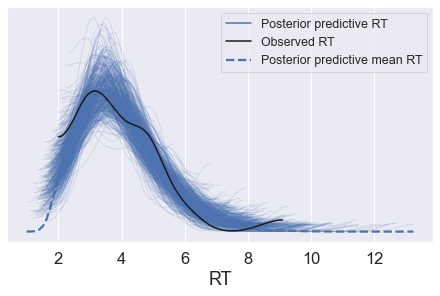

In [27]:
'''Posterior draws from model'''
with model:
    ppc = pm.sample_posterior_predictive(
        trace, random_seed=RANDOM_SEED, samples=500
    )

az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=model));

Task median [3.51747238 5.22836344]
4.453682154719031
Fwd median [2.44912882 3.83344964]
3.189390995035822
Task 95th [5.090366   8.04504115]
6.525952131950648
Fwd 95th [3.44754744 5.693532  ]
4.562147512036784


<AxesSubplot:ylabel='Density'>

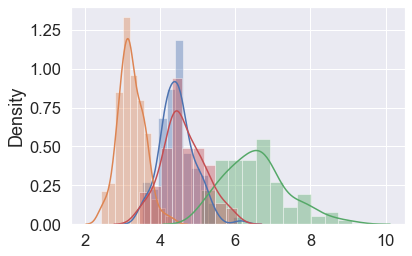

In [28]:
'''Predicted response times based on last exposure to TOR'''
task, fwd, task95, fwd95 = list(), list(), list(), list()
for i in range(0,100):
    task.append(np.median(ppc['RT'][i][(df_rt['Glance at take-over request']=='Task')& (df_rt['Exposure']==6)]))
    fwd.append(np.median(ppc['RT'][i][(df_rt['Glance at take-over request']=='Forward')& (df_rt['Exposure']==6)]))
    task95.append(np.percentile(ppc['RT'][i][(df_rt['Glance at take-over request']=='Task')& (df_rt['Exposure']==6)], 95))
    fwd95.append(np.percentile(ppc['RT'][i][(df_rt['Glance at take-over request']=='Forward')& (df_rt['Exposure']==6)],95))
    
print('Task median', pm.stats.hpd(np.array(task), 0.95)); print(np.median(task))
print('Fwd median', pm.stats.hpd(np.array(fwd), 0.95)); print(np.median(fwd))
print('Task 95th', pm.stats.hpd(np.array(task95), 0.95)); print(np.median(task95))
print('Fwd 95th', pm.stats.hpd(np.array(fwd95), 0.95)); print(np.median(fwd95))
sns.distplot(task)
sns.distplot(fwd)
sns.distplot(task95)
sns.distplot(fwd95)